### Loading the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

%matplotlib inline

### Loading the dataset 

In [3]:
df = pd.read_csv("D:\Data Projects\Practice Files\hollywood profitable stores\Hollywoods Most Profitable Stories.csv")
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007
...,...,...,...,...,...,...,...,...
69,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,219.367646,2008
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040000,2010
71,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.660000,2010
72,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,19.620000,2010


In [4]:
df.shape

(74, 8)

In [5]:
df.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
count,73.000000,71.000000,73.000000,74.000000,74.000000
mean,64.136986,4.741610,47.356164,136.351979,2009.054054
std,13.647665,8.292017,26.242655,157.067561,1.353756
min,35.000000,0.005000,3.000000,0.025000,2007.000000
25%,52.000000,1.790680,27.000000,32.447500,2008.000000
50%,64.000000,2.642353,45.000000,73.198612,2009.000000
75%,76.000000,4.850958,65.000000,190.185250,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


### Cleaning the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               74 non-null     object 
 1   Genre              74 non-null     object 
 2   Lead Studio        73 non-null     object 
 3   Audience  score %  73 non-null     float64
 4   Profitability      71 non-null     float64
 5   Rotten Tomatoes %  73 non-null     float64
 6   Worldwide Gross    74 non-null     float64
 7   Year               74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


In [7]:
df.isnull().sum()

Film                 0
Genre                0
Lead Studio          1
Audience  score %    1
Profitability        3
Rotten Tomatoes %    1
Worldwide Gross      0
Year                 0
dtype: int64

In [22]:
df["Lead Studio"] = df["Lead Studio"].fillna(method = "ffill")
df["Lead Studio"]

0                       Fox
1                       Fox
2               Independent
3                 Universal
4               Independent
              ...          
69                      Fox
70                   Disney
71              Independent
72    The Weinstein Company
73    The Weinstein Company
Name: Lead Studio, Length: 74, dtype: object

In [23]:
df["Audience  score %"] = df["Audience  score %"].fillna(df["Audience  score %"].mean())
df["Audience  score %"]

0     71.0
1     81.0
2     89.0
3     64.0
4     84.0
      ... 
69    72.0
70    44.0
71    35.0
72    52.0
73    70.0
Name: Audience  score %, Length: 74, dtype: float64

In [24]:
df["Profitability"] = df["Profitability"].fillna(df["Profitability"].mean())
df["Profitability"]

0     5.343622
1     8.096000
2     0.448645
3     4.382857
4     0.652603
        ...   
69    6.267647
70    4.741610
71    1.211818
72    1.090000
73    1.747542
Name: Profitability, Length: 74, dtype: float64

In [28]:
df["Rotten Tomatoes %"] = df["Rotten Tomatoes %"].fillna(df["Rotten Tomatoes %"].mean())
df["Rotten Tomatoes %"]

0     40.0
1     87.0
2     79.0
3     89.0
4     54.0
      ... 
69    28.0
70    15.0
71    43.0
72    68.0
73    64.0
Name: Rotten Tomatoes %, Length: 74, dtype: float64

In [29]:
df.isnull().sum()

Film                 0
Genre                0
Lead Studio          0
Audience  score %    0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
dtype: int64

In [30]:
df.duplicated().sum()

0

<Axes: >

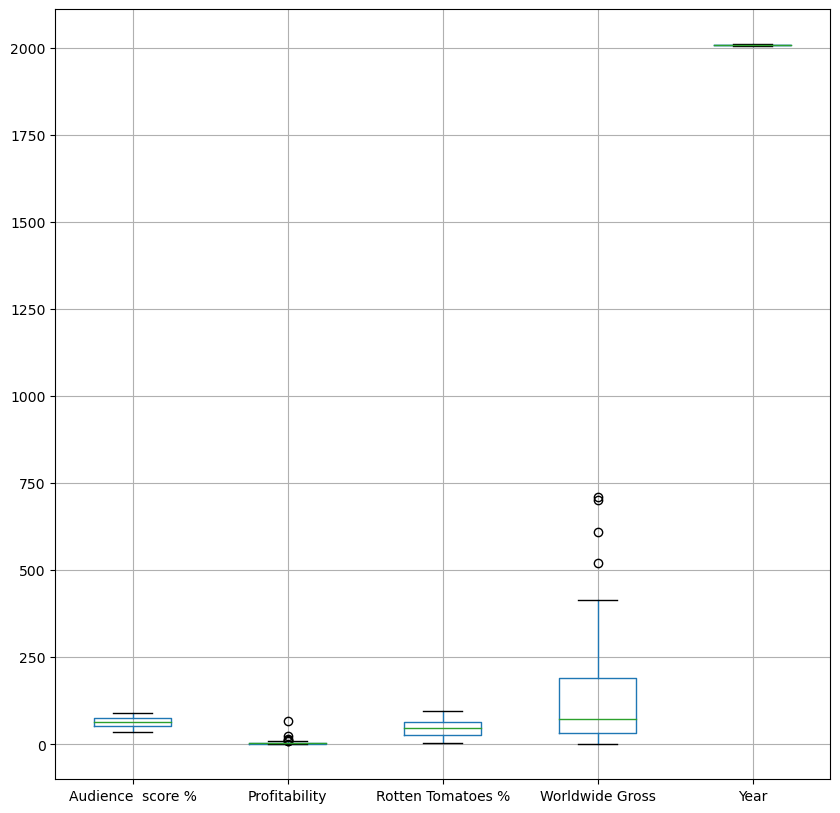

In [34]:
plt.figure(figsize=(10,10))
df.boxplot()

In [35]:
# due to the small size of the dataset, I focused on dealing with the outliers in the worldwide gross column
# Outliers Worldwide Gross

q1 = df["Worldwide Gross"].quantile(0.25)
q3 = df["Worldwide Gross"].quantile(0.75)

iqr = q3 - q1

In [36]:
print(q1, q3, iqr)

32.4475 190.18525 157.73775


In [38]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

In [40]:
df.loc[(df["Worldwide Gross"] > upper_limit) | (df["Worldwide Gross"] < lower_limit)]

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
29,Mamma Mia!,Comedy,Universal,76.0,9.234454,53.0,609.473955,2008
59,The Twilight Saga: New Moon,Drama,Summit,78.0,14.196400,27.0,709.820000,2009
62,Twilight: Breaking Dawn,Romance,Independent,68.0,6.383364,26.0,702.170000,2011
67,WALL-E,Animation,Disney,89.0,2.896019,96.0,521.283432,2008


In [42]:
df1 = df.loc[(df["Worldwide Gross"] < upper_limit) & (df["Worldwide Gross"] > lower_limit)]
df1

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007
...,...,...,...,...,...,...,...,...
69,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,219.367646,2008
70,When in Rome,Comedy,Disney,44.0,4.741610,15.0,43.040000,2010
71,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.660000,2010
72,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,19.620000,2010


In [44]:
print("before removing outliers:", len(df))
print("after removing outliers:", len(df1))
print("outliers:", len(df) - len(df1))

before removing outliers: 74
after removing outliers: 70
outliers: 4


### Analyzing and visualizing the dataset

In [45]:
hollywood = df1

In [46]:
hollywood.corr()

C:\Program Files\KMSpico\temp\ipykernel_9280\575428656.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hollywood.corr()


,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
Audience score %,1.000000,0.022658,0.609263,0.364024,-0.166950
Profitability,0.022658,1.000000,0.044119,0.092150,-0.164393
Rotten Tomatoes %,0.609263,0.044119,1.000000,0.043150,-0.029184
Worldwide Gross,0.364024,0.092150,0.043150,1.000000,-0.221011
Year,-0.166950,-0.164393,-0.029184,-0.221011,1.000000


#### Profitability of the film as per the Genre 

Text(0.5, 1.0, 'Film Probability per Genre')

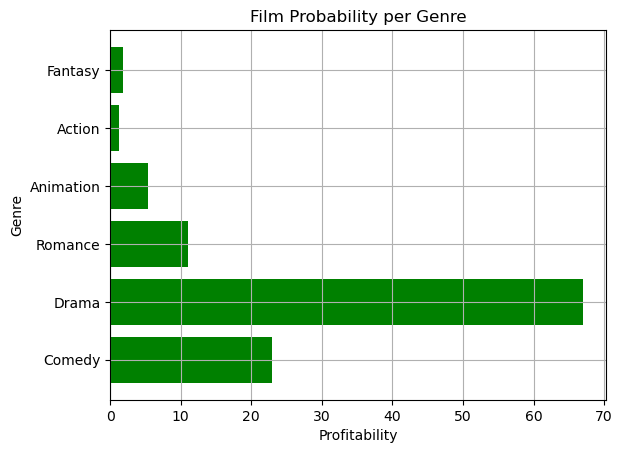

In [53]:
plt.barh(hollywood["Genre"], hollywood["Profitability"], color = ("green"))
plt.xlabel("Profitability")
plt.ylabel("Genre")
plt.grid(True)
plt.title("Film Probability per Genre")

#### Gross Sales per Film Genre

Text(0.5, 1.0, 'Film Profit per Genre')

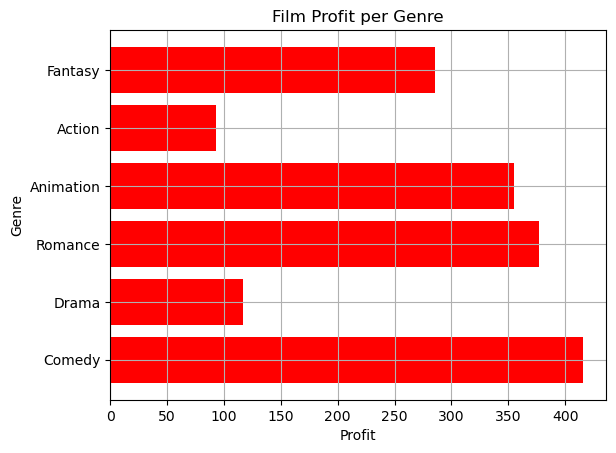

In [54]:
plt.barh(hollywood["Genre"], hollywood["Worldwide Gross"], color = ("red"))
plt.xlabel("Profit")
plt.ylabel("Genre")
plt.grid(True)
plt.title("Film Profit per Genre")

#### Profitability per Studio

Text(0.5, 1.0, 'Film Probability per Studio')

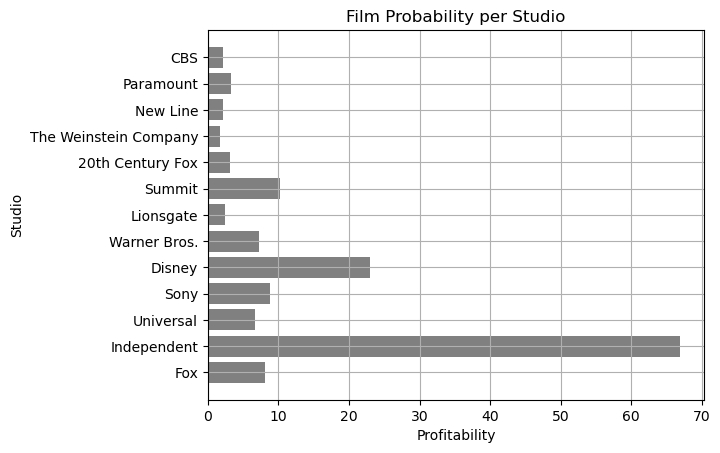

In [56]:
plt.barh(hollywood["Lead Studio"], hollywood["Profitability"], color = ("grey"))
plt.xlabel("Profitability")
plt.ylabel("Studio")
plt.grid(True)
plt.title("Film Probability per Studio")

#### Profit per Studio

Text(0.5, 1.0, 'Film Profit per Studio')

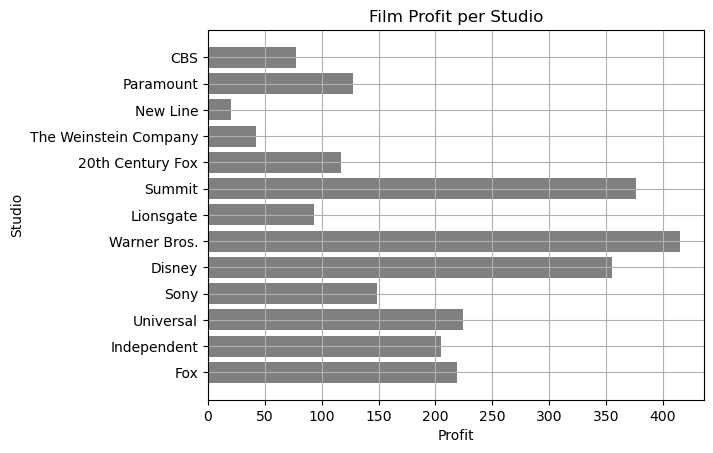

In [57]:
plt.barh(hollywood["Lead Studio"], hollywood["Worldwide Gross"], color = ("grey"))
plt.xlabel("Profit")
plt.ylabel("Studio")
plt.grid(True)
plt.title("Film Profit per Studio")

#### Profit and Audience Score Growth Overtime per Genre

Text(0.5, 1.0, 'Profit and Audience Score Growth Overtime')

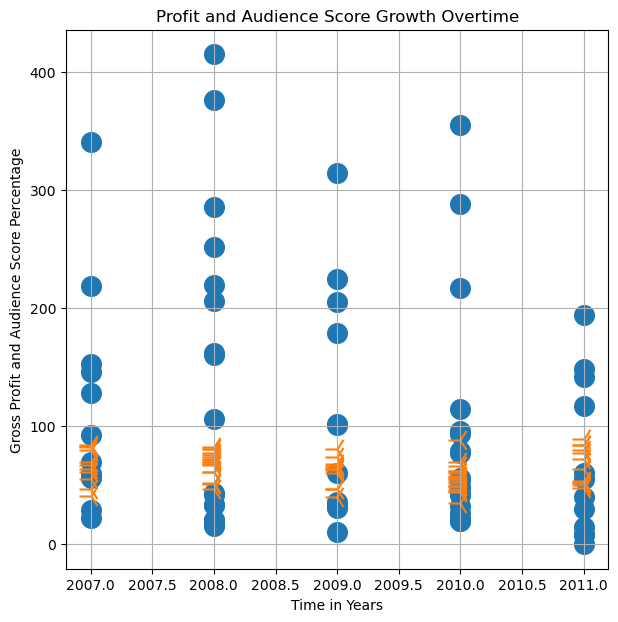

In [62]:
plt.figure(figsize=(7,7))
plt.scatter(hollywood["Year"], hollywood["Worldwide Gross"], s= 200)
plt.scatter(hollywood["Year"], hollywood["Audience  score %"], s= 300, marker = "3")
plt.xlabel("Time in Years")
plt.ylabel("Gross Profit and Audience Score Percentage")
plt.grid(True)
plt.title("Profit and Audience Score Growth Overtime")

#### Relationship between Time (Years) and Rate of Rejection

C:\Program Files\KMSpico\temp\ipykernel_9280\1074963171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([hollywood["Year"], hollywood["Rotten Tomatoes %"]])


<Axes: ylabel='Density'>

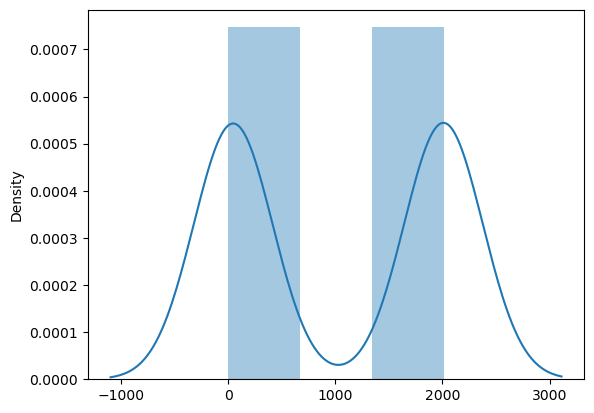

In [71]:
sns.distplot([hollywood["Year"], hollywood["Rotten Tomatoes %"]])